## クラスタリング

### k-meansクラスタリング

データのある領域を代表するような`クラスタ重心`を見つけようとするアルゴリズム

1. 個々のデータポイントを最寄りのクラスタ重心に割り当てる
2. 個々のクラスタ重心をその点に割り当てられたデータポイントの平均に設定する(最短距離のクラスタと結合する)
3. 1へ戻る

重心をとって、近いのを取りの繰り返し。    


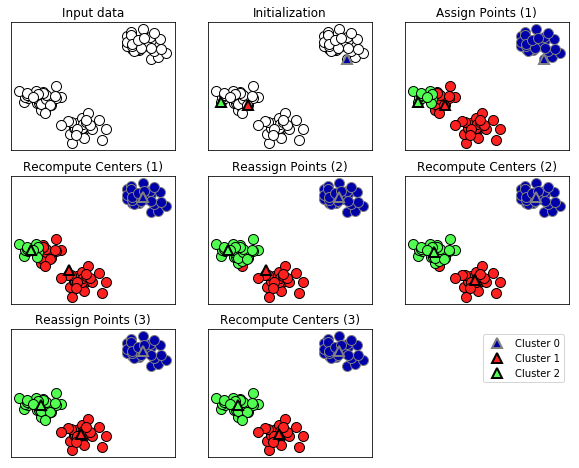

In [2]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np

mglearn.plots.plot_kmeans_algorithm()
plt.show()

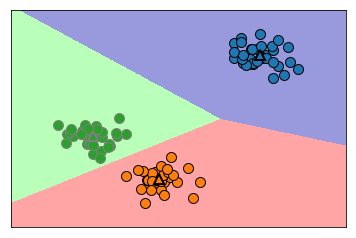

In [3]:
mglearn.plots.plot_kmeans_boundaries()
plt.show()

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

predictを使えばlabels_と同じ結果が得られる

In [5]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [6]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


クラスタリングには真のラベルがない。    
cluster_centers_にクラスタセンターが保持されてるので描画できる。

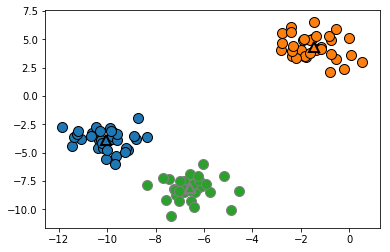

In [8]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.show()

5クラスタに増やした場合

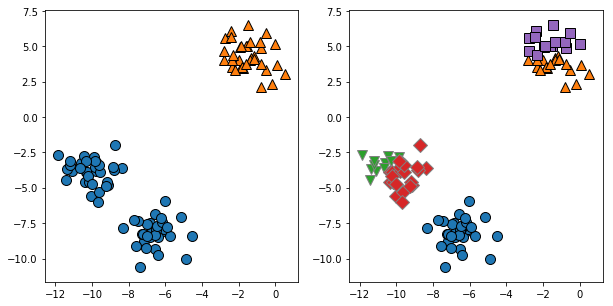

In [124]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

plt.show()

### k-meansがうまくいかない場合

クラスタが凸な形状になる(ボコボコしてると辛い)。真ん中のクラスタ２がどこまで踏まれればいいのか不明。本ではクラスタ０とクラスタ１はもっとまとまったデータのみをラベル付けしてほしいと見てるようだ。

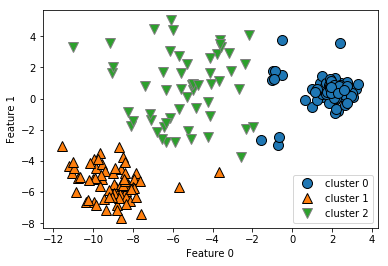

In [8]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

k-meansは最も近いクラスタセンタへの距離しか考慮しないので，丸くないクラスタを識別出来ない

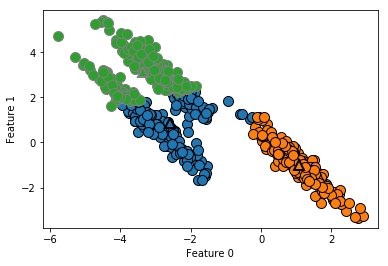

In [9]:
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

また複雑な形に対してもk-means法はうまく機能しない

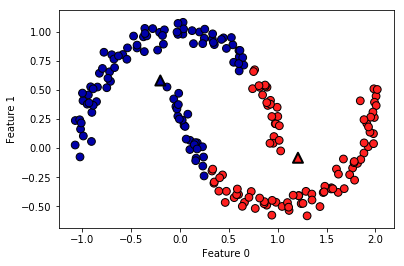

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2, edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
ｐｌｔ.show()

#### ベクトル量子化, もしくは成分分解としてのk-means

k-meansはクラスタリングアルゴリズムだが，PCAやNMFなどの成分分解手法の間には類似性がある．
- PCA
    - データ中の最も分散が大きい方向を見出そうとする
- NMF
    - 足しこんで行くことの出来る成分を見つけようとする
    
これらの手法はデータポイントを複数の成分の和として表現しようとする．

k-meansはクラスタセンタで個々のデータポイントを表現しようとする．=>個々のデータポイントをクラスタセンタとして与えられる単一の成分で表現していると考えることが出来る．

k-meansを単一成分で個々のデータポイントを表現する成分分解手法として見る考え方を`ベクトル量子化`と呼ぶ

In [169]:
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.


X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

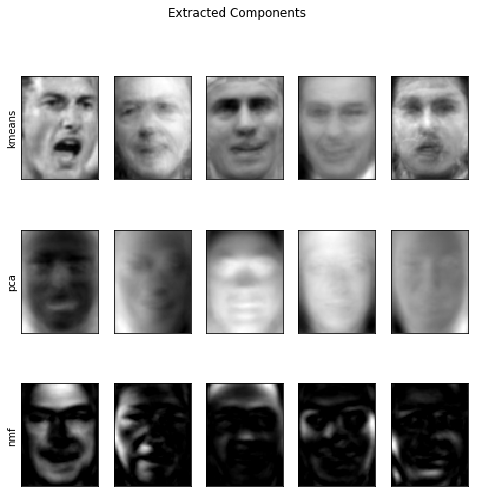

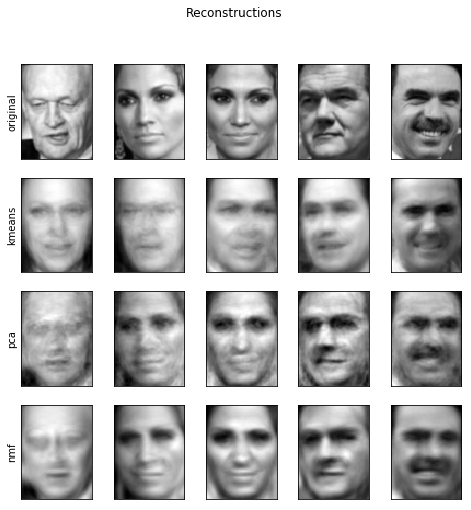

In [170]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(3, 5, figsize=(8, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape), cmap='gray')
    ax[1].imshow(comp_pca.reshape(image_shape) , cmap='gray')
    ax[2].imshow(comp_nmf.reshape(image_shape) , cmap='gray')

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):

    ax[0].imshow(orig.reshape(image_shape), cmap='gray')
    ax[1].imshow(rec_kmeans.reshape(image_shape), cmap='gray')
    ax[2].imshow(rec_pca.reshape(image_shape), cmap='gray')
    ax[3].imshow(rec_nmf.reshape(image_shape), cmap='gray')

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")
plt.show()

PCAは極端た特徴。NMFは部品。    
Extracted Components : k-meansのクラスタセンタとPCA、NMFで発見した成分の比較。    
Reconstructions : 再構成画像の比較。PCA、NMFは１００成分を使用。k-meansは画像ごとにクラスタセンタのみ使用。

<hr>

k-meansを用いたベクトル量子化は，入力次元の数よりもはるかに多くのクラスタを使うことが出来ることだ．

two_moonsデータセットのように二次元のような次元数が少ないものに対しては，PCAやNMFを用いると次元を減らすので，データの構造が破壊されてしまう．
しかし多数のクラスタセンタでk-meansを用いれば，次元数を増やすことができ，更に強力な表現を見つけることが出来る

### クラスタを増やす

クラスタを増やすと複雑なデータセットの分散をカバーできる。０〜９のクラスタに相当する部分を１として、クラスタ以外の特徴量を０のデータとする。    
この１０次元の特徴量を使えば線形分離できる。    
さらにクラスタセンターからの距離を特徴量として使うとさらに強力になる。transformを使用すれば良い。

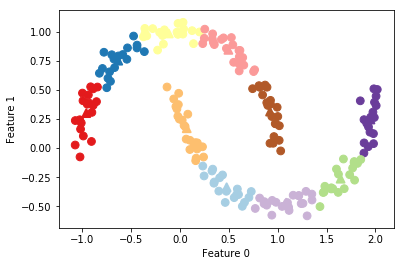

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


In [127]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()
print("Cluster memberships:\n{}".format(y_pred))

In [128]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


### k-meansまとめ

- メリット
    - 比較的高速
- デメリット
    - 初期化が乱数で行われる
    - クラスタの形に対してかなり制約の強い仮定を必要とする
    - 探しているクラスタの数をユーザが指定しなければ行けない事

### 凝集型クラスタリング　ぎょうしゅう

`凝集型クラスタリング`はある原則に基づく一連のクラスタリングアルゴリズムである．これらのアルゴリズムは個々のデータポイントをそれぞれ個別のクラスタとして開始し，最も類似した2つのクラスタを合併している．これは何らかの終了条件を満たされるまで繰り返す．scikit-learnに実装されている終了条件はクラスタの数である．

「最も類似したクラスタ」を決定する`連結(linkage)`度には様々なものがあり，この連結度は常に2つの既存クラスタ間に定義される．

- ward
    - デフォルト．併合した際にクラスタ内の距離の分散の増分が最小になるように2つのクラスタを選択する．比較的同じサイズのクラスタになる．
- average
    - クラスタ間の全てのポイント間の距離の平均値が最小の2クラスタを併合する．
- complete
    - 2クラスタの点間の距離の最大値が最小となるものを併合する
    
wardは殆どのデータセットでうまく行く．クラスタによってデータポイントの数が極端に違う場合average, completeの方がうまくいく可能性がある．

下記は２つの最も近いクラスタの併合を繰り返す凝集型クラスタリング

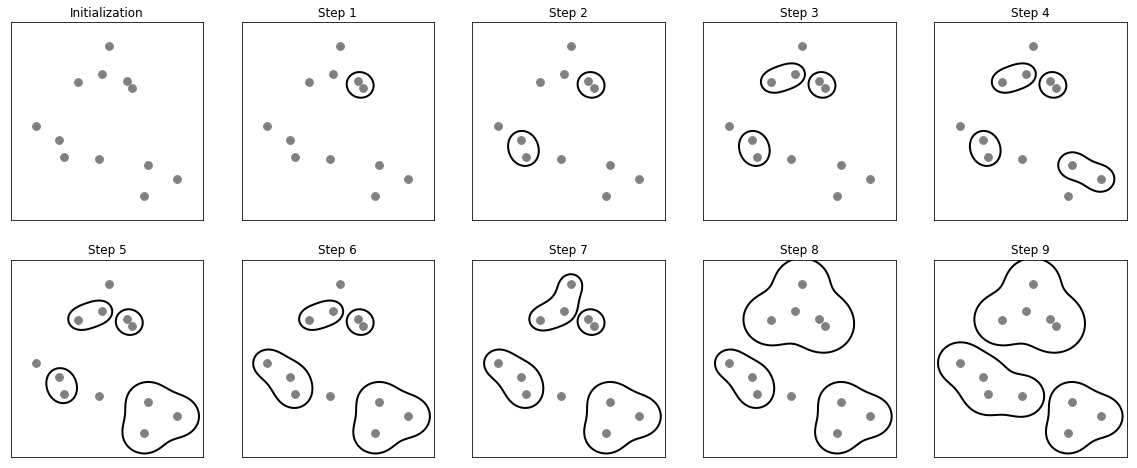

In [129]:
mglearn.plots.plot_agglomerative_algorithm()
plt.show()

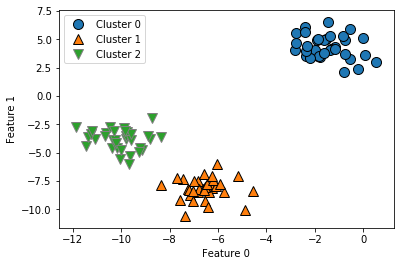

In [130]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

k-means法ではクラスタ数を指定しなければならないが，凝集型クラスタリングメソッドは正しいクラスタ数を選択する手助けをしてくれる．

### 階層型クラスタリングとデンドログラム

凝集型クラスタリングを行うと，いわゆる`階層型クラスタリング`が行われる．このクラスタリングは同じ手続きを繰り返すことで行われる．すべての点は一点しか含まれていないクラスタから最後のクラスタのいずれかに向かっていく．繰り返しの各ステップ終了時はそれぞれ異なる．

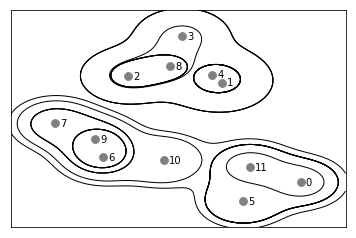

In [131]:
mglearn.plots.plot_agglomerative()
plt.show()

階層型クラスタリングを可視化するには`デンドログラム`と呼ばれる方法がある．    
scikit learnにはないが、scipyに描画メソッドがある。

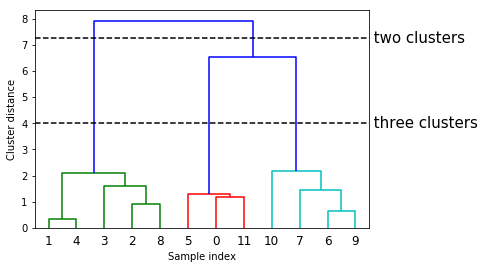

In [132]:
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)

#scipyのward関数は、凝集型クラスタリングを行った際のブリッジ距離の配列
linkage_array = ward(X)
#クラスタ間距離をデンドログラムとしてプロット
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

一番下がデータポイント。枝の長さがクラスタの距離を示す。    
凝集型でもtwo_moonsのような複雑な形状にはうまくいかない。

### DBSCAN

密度に基づくノイズあり空間クラスタリング
- メリット
    - ユーザがクラスタ数を先験的に与える必要がない
    - どのクラスタリングにも属さない点を判別できることである
    
DBSCANは特徴空間に置いて多くの点が近接しているような「混んでいる」領域に属する点を見つける．このような領域は特徴空間の`高密度`領域と呼ばれる．DBSCANはクラスタはデータ中で高密度領域を構成していて，空虚な領域で区切られているという考え方に基づく．

高密度領域の中にあるデータポイントは`コアサンプル`と呼ばれる．
DBSCANにはmin_samplesとepsをいう2つのパラメータがある．

あるデータポイントから距離eps以内にmin_samples以上のデータポイントがある場合に，そのデータポイントはコアサンプルとなる．DBSCANでは，esp以内にあるコアサンプルは同じクラスタに割り当てられる．

#### アルゴリズム

1. 適当に一つのデータポイントを選ぶところから始まる．そのデータポイントから距離esp以内にある全てのデータポイントを見つける

2. その数がmin_samples以下なら，ノイズとなる．以上ならその点コアサンプルとなり，新しいクラスタラベルが割り当てられる．

3. esp以内にある全ての近傍点をテストし，それらの点がまだクラスタに割り当てられて居なければ，新しい近傍点をテストする．近傍点がコアサンプルであれば，その近傍を更にテストする．

4. クラスタは，クラスタからesp以内にコアサンプルが存在しなくなるまで成長を続ける．

5. これが終わると，まだ調べていない点を選んで同じ手続きを繰り返す

#### 最終的な成果物

- コアポイント
- 境界ポイント(コアポイントから距離esp以内にあるデータポイント)
- ノイズ

In [134]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


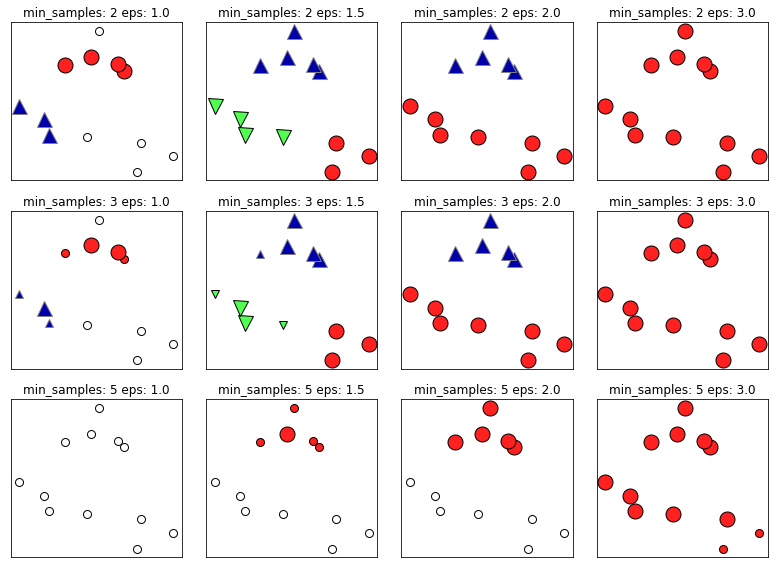

In [135]:
mglearn.plots.plot_dbscan()
plt.show()

ノイズが白。コアサンプルは丸。境界点は小さい丸。epsを増やすとより多くの点がクラスタに含まれるようになる。クラスタは大きくなるがクラスタが合体することにもなる。min_samplesを増やすとコアポイントになるデータポイントがへり、ノイズが多くなる。    
データポイントが近いことの意味を決めるのでepsの方が重要。
epsを減らしすぎると全部ノイズになり、大きくしすぎると１つのクラスタになってしまう。    
min_samplesを大きくしすぎるとmin_samples以下のデータポイントしか持たないクラスタがノイズになる。


espで暗黙的にクラスタ数を制御することになるが，よいespの値を見るけるにはStandardScalerやMinMaxScalerでスケール変換してからの方が用意なことが多い．

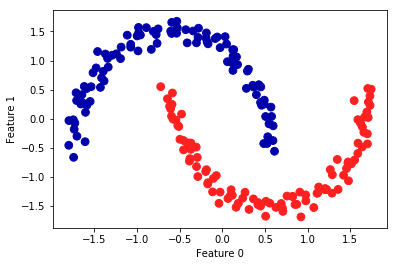

In [136]:
from sklearn.preprocessing import StandardScaler
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN(eps=0.5)
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

クラスタリング結果にはノイズを表す-1があるので、別モデルで特徴量を使うときは注意。

## クラスタリングアルゴリズムの比較と評価

クラスタリングアルゴリズムを利用する際には，アルゴリズムがどの程度うまく機能したかを判断し，書くアルゴリズムがどの程度うまく機能したかを判断するのが難しい．

#### 正解アルゴリズムを用いたクラスタリングの評価

クラスタリングアルゴリズムの出力を，正解データクラスタリングと比較して評価するために用いられる指標

- 調整ランド指数(ARI)
- 正規化相互情報量(NMI)

定量的な指標で裁量な場合を1, 関係無いクラスタリング場合0を取る

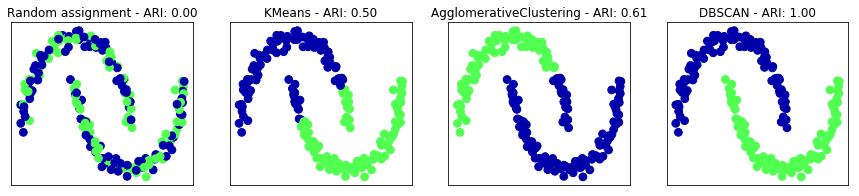

In [137]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))
plt.show()

adjusted_rand_scoreを使用。教師ありARIスコアで、割り当てて比較。DBSCANのARIが良い。    
よくある間違いとしてaccuracy_scoreを使ってしまうことがある。accuracy_scoreは正解データに完全一致が要求される。
クラスラベル自身には意味がなく、あるクラスタにどのデータポイントが含まれているかだけが重要。

In [160]:
from sklearn.metrics import accuracy_score

clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

clusters1 = [0, 0, 0, 0, 0]
clusters2 = [1, 1, 0, 0, 1]
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

clusters1 = [0, 0, 0, 0, 1]
clusters2 = [1, 1, 0, 0, 1]
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00
Accuracy: 0.40
ARI: 0.00
Accuracy: 0.60
ARI: -0.15


#### 正解データを用いないクラスタリングの評価

- シルエット係数
    - クラスタのコンパクトさを計算する，大きい方がよく，完全な場合で1になる    

クラスタがコンパクトなことはいいことだが、複雑な形状のクラスタはコンパクトにはならない。    


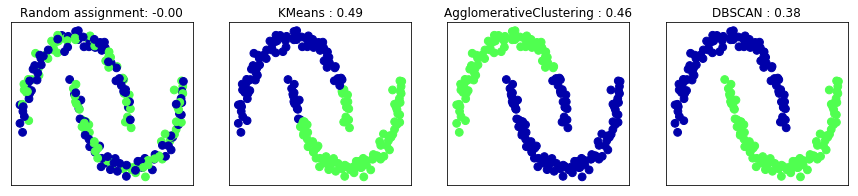

In [139]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))
plt.show()

kmeansの方がシルエット係数は良い。もっといい指標もあるが、まだライブラリに入ってない。    
正解データがない場合は最終的には目で見て確認するしかない。

#### 顔画像データセットを用いたアルゴリズムの比較

顔画像データセットにて何かしらの興味深い構造を見つけられるか試してみる。PCAで生成された100成分の固有顔表現を使用する。

In [161]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

##### DBSCANによる解析

全てのラベルが-1になっており、ノイズと判断されている。

In [141]:
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


min_samplesを小さくして小さいグループをクラスタとして識別させても-1になった。

In [162]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


epsを大きくしてここの点の近傍を拡大すると0が増えた。この結果を使って、ノイズが他のデータと比べてどう違うのか見てみることもできる。

In [164]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1  0]


より理解するために、ノイズとクラスタの比率を確認する。ノイズが35。

In [165]:
print("Number of points per cluster: {}".format(np.bincount(labels + 1)))

Number of points per cluster: [  35 2028]


ノイズを確認する。グラスから飲み物を飲んでいたり、角度が違ったり、画角が違ったりする。このように外れ値検出にもクラスタリングは使える。

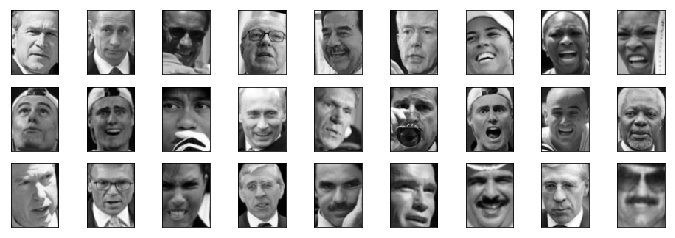

In [168]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1, cmap='gray')

plt.show()

興味深い点として大きいクラスタが一つ以上得られることがないこと。これはデータセット内に明らかに異なるグループがなく、全ての顔画像が似ている（もしくは同じように似ていない）ということ。eps=7が面白そうなので深ぼる。

In [146]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("Number of clusters: {}".format(len(np.unique(labels))))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))


eps=1
Number of clusters: 1
Cluster sizes: [2063]

eps=3
Number of clusters: 1
Cluster sizes: [2063]

eps=5
Number of clusters: 2
Cluster sizes: [2060    3]

eps=7
Number of clusters: 10
Cluster sizes: [2015    3   18    4    3    3    3    4    7    3]

eps=9
Number of clusters: 7
Cluster sizes: [1308  740    3    3    3    3    3]

eps=11
Number of clusters: 2
Cluster sizes: [ 428 1635]

eps=13
Number of clusters: 2
Cluster sizes: [ 128 1935]


クラスタのいくつかは特定の顔に対応(sharon koizumi)。ここのクラスタ内では顔の向きや表情が一致。

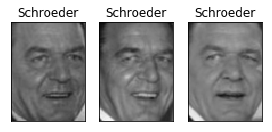

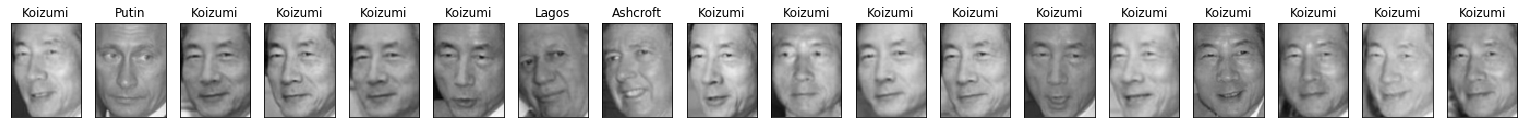

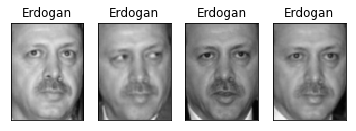

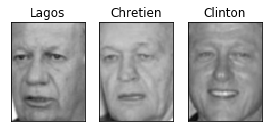

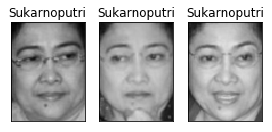

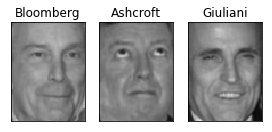

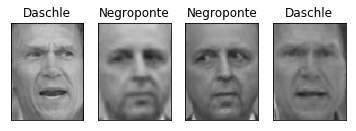

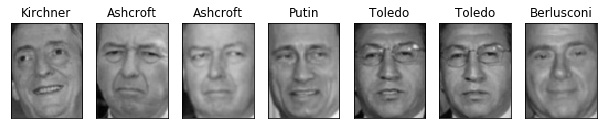

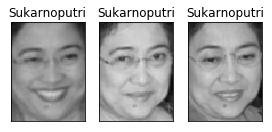

In [171]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images =  np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4),
                             subplot_kw={'xticks': (), 'yticks': ()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):

        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1, cmap='gray')
        ax.set_title(people.target_names[label].split()[-1])
    
plt.show()

他のにも適応してみる

##### k-means

DBSCANでは大きいクラスタ１つしか作れないことがわかった。    
→顔画像データはデータが密集しており同じ高密度領域と捉えられてしまうのかも？    
KMeansの１０クラスタで試してみる。

In [172]:
# extract clusters with k-Means
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

Cluster sizes k-means: [ 78 179 179 189 235 355 286 252 139 171]


引く的同じくらいの比率で分割している。pcaで作った表現をクラスタリングしたので、元の空間で可視化するにはinverse_transformを使用する。

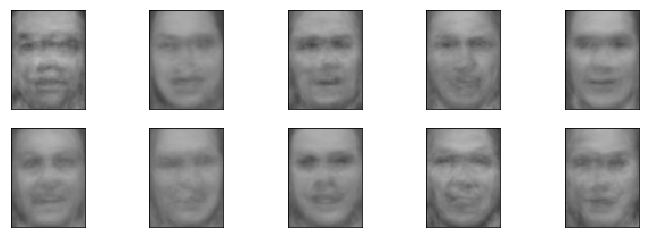

In [173]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape),
              vmin=0, vmax=1, cmap='gray')
plt.show()

kmeansで見つかったクラスタセンターは平坦化された顔画像。平均値なので驚くべきことではない。pcaで次元削除も平坦化に貢献している。

左がセンター。右がセンターから遠い。このクラスタでは顔の向き、表情、シャツが抽出できてるように見える。    
ノイズの概念がないので、どこかのクラスタに分割している。クラスタ数を増やせば、もっと目で相違を見つけるのが大変になる。

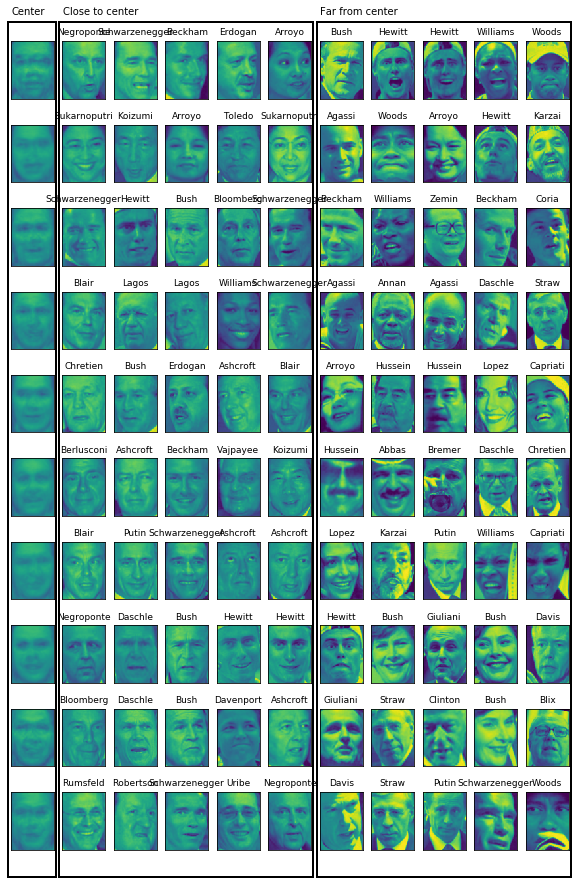

In [175]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)
plt.show()

#### 凝集型クラスタリング

In [151]:
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))

cluster sizes agglomerative clustering: [560 108 168 281 133 200  44  52 445  72]


labels_aggとlabels_kmのARIは低い。labels_aggとlabels_kmにほとんど共通点がないことを意味する。k-meansでクラスタセンターから遠い画像がクラスタセンターと似ていなかったことを考えると驚くべきことではない。

In [152]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.09


デンドログラムを描画する。２０６３個のデータポイントまで分割を全て書くと密度が高くなり見えなくなるので、深さの制限を入れている。

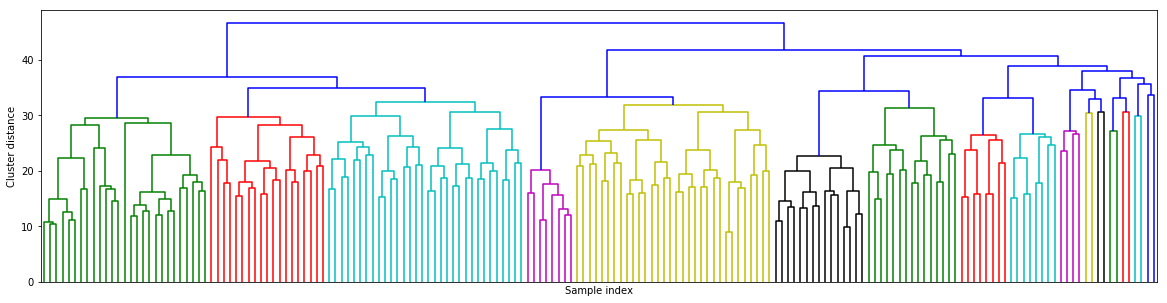

In [153]:
linkage_array = ward(X_pca)

plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

10クラスタを作るには木構造の上の方、１０本の垂直線しかないところで切ることになる。クラスタには何か意味がありそうだが、混ざっているようにも見えるのでクラスタを細かくしてみる。

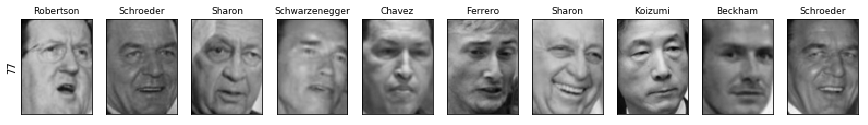

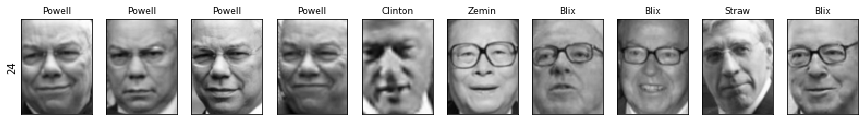

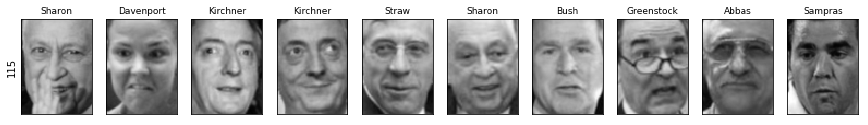

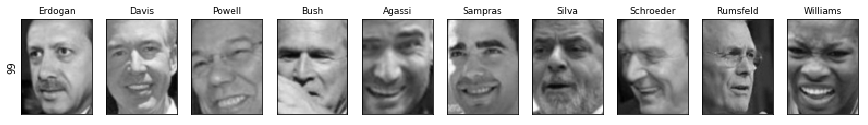

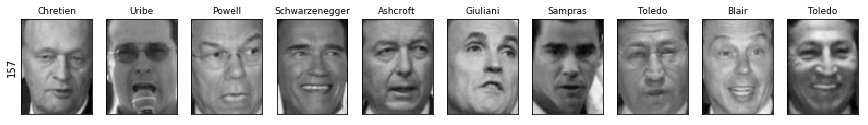

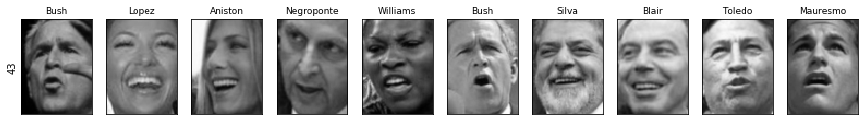

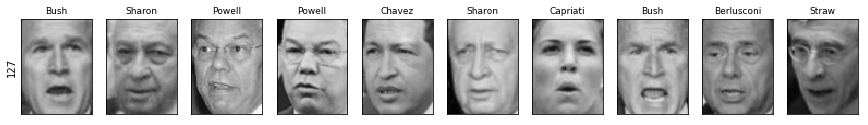

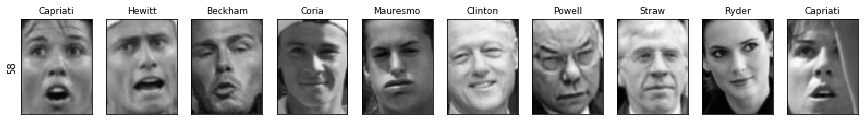

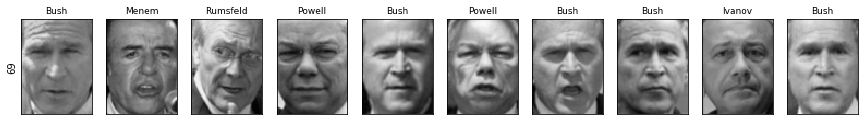

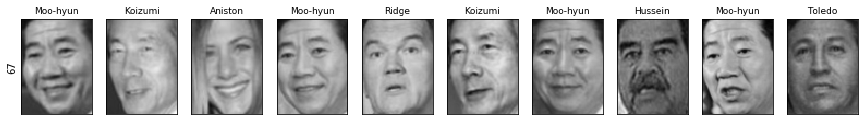

In [176]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1, cmap='gray')
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})
        
plt.show()

40クラスタにした。笑っている、襟付きシャツ、笑っている女性、フセイン、おでこが広いといった特徴を拾っているように見える。   
より詳細に解析すれば、高度に類似したクラスタをデンドログラムから見つけられるはずだ。

cluster sizes agglomerative clustering: [ 77  24 115  99 157  43 127  58  69  67 100  40  19 264  19  66  45  18
  48  52  66  27  13  27  36  25   4   9  17   4   6  47   2   1  54  10
  49 117   4  38]


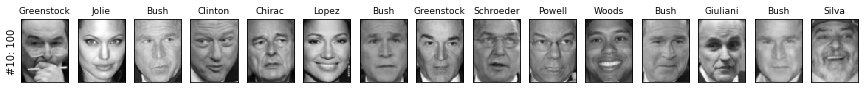

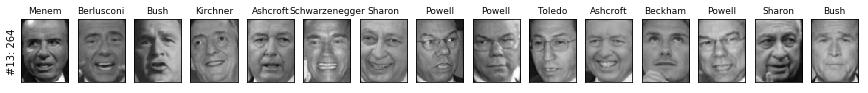

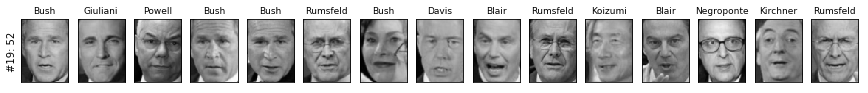

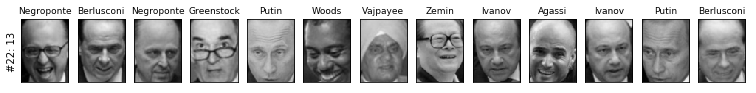

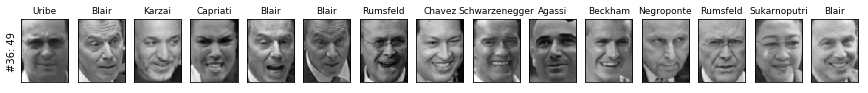

In [177]:
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))

n_clusters = 40
for cluster in [10, 13, 19, 22, 36]: 
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1, cmap='gray')
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)
        
plt.show()

### クラスタリング手法のまとめ

- k-means
    - クラスタセンタを用いてクラスタの特徴を表すことが出来る
    - 個々のデータポイントがクラスタセンタによって表現された成分分解手法
- DBSCAN
    - ノイズを検出可能
    - 自動的にクラスタの数を決められる
    - 複雑な形状のクラスタを発見出来る
- 凝集型クラスタリング
    - データの階層的な分割の候補を提示出来る

k-meansと凝集型クラスタリングではクラスタの数を指定することが出来る．
DBSCANではepsパラメータを用いて近接度を指定すると，間接的にクラスタサイズを制御することが出来る．

# Kmeans実装

始めは各データをクラスタとする。クラスタの重心から一番近いクラスタを結合する。これを始めに決めたクラスタ数になるまで結合を繰り返す。距離計算にはユーグリッド距離等が使われる。

In [100]:
import random as rand
import math as math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

ユーグリッド距離

$$d(p, q) = d(q, p) = \sqrt{ (q1- p1)^{2} + (q2- p2)^{2} ... (qn- pn)^{2}} = \sqrt{\sum_{i=1}^{n}  (qi- pi)^{2}} $$

In [101]:
l2 = lambda x,y : np.sqrt(np.sum(np.square(np.subtract(x,y))))
print(l2(X[0], X[1]))

1.2064510284824093


データを保管するクラス作成

In [102]:
class Point:
    def __init__(self, latit_, longit_):
        self.latit = latit_
        self.longit = longit_

データを保管

In [103]:
geo_locs = []
for line in X:
    loc_ = Point(float(line[0]), float(line[1]))  #tuples for location
    geo_locs.append(loc_)

geo_locations = geo_locs
k = 3 #num of cluster
clusters = []  #clusters of nodes
means = []     #means of clusters
points = [point for point in geo_locations]

## 初期処理

ランダムに始めのノードを指定

In [104]:
point_ = rand.choice(points)

クラスタに含める

In [105]:
clusters = dict()
clusters.setdefault(0, []).append(point_)
points.remove(point_)

指定したクラスタ数繰り返す

In [106]:
def next_random(index, points, clusters):
        #pick next node that has the maximum distance from other nodes
        dist = {}
        for point_1 in points:
            #compute this node distance from all other points in cluster
            for cluster in clusters.values():
                point_2 = cluster[0]
                if point_1 not in dist:
                    dist[point_1] = math.sqrt(math.pow(point_1.latit - point_2.latit,2.0) + math.pow(point_1.longit - point_2.longit,2.0))       
                else:
                    dist[point_1] += math.sqrt(math.pow(point_1.latit - point_2.latit,2.0) + math.pow(point_1.longit - point_2.longit,2.0))
        #now let's return the point that has the maximum distance from previous nodes
        count_ = 0
        max_ = 0
        for key, value in dist.items():
            if count_ == 0:
                max_ = value
                max_point = key
                count_ += 1
            else:
                if value > max_:
                    max_ = value
                    max_point = key
        return max_point

In [107]:
for i in range(1, k):
    point_ = next_random(i, points, clusters)
    clusters.setdefault(i, []).append(point_)
    points.remove(point_)

クラスタ平均を計算

In [108]:
def compute_mean(clusters):
    means = []
    for cluster in clusters.values():
        mean_point = Point(0.0, 0.0)
        cnt = 0.0
        for point in cluster:
            mean_point.latit += point.latit
            mean_point.longit += point.longit
            cnt += 1.0
        mean_point.latit = mean_point.latit/cnt
        mean_point.longit = mean_point.longit/cnt
        means.append(mean_point)
    return means

In [109]:
means = compute_mean(clusters)

In [110]:
means

# 近いクラスタを結合

ポイントを割り当てる

In [111]:
def assign_points(points, means):
    clusters = dict()
    for point in points:
        dist = []
        #find the best cluster for this node
        for mean in means:
            dist.append(math.sqrt(math.pow(point.latit - mean.latit,2.0) + math.pow(point.longit - mean.longit,2.0)))
        #let's find the smallest mean
        cnt_ = 0
        index = 0
        min_ = dist[0]
        for d in dist:
            if d < min_:
                min_ = d
                index = cnt_
            cnt_ += 1
        clusters.setdefault(index, []).append(point)
    return clusters

更新する

In [112]:
def update_means(means, threshold):
    #check the current mean with the previous one to see if we should stop
    for i in range(len(means)):
        mean_1 = means[i]
        mean_2 = means[i]
        if math.sqrt(math.pow(mean_1.latit - mean_2.latit,2.0) + math.pow(mean_1.longit - mean_2.longit,2.0)) > threshold:
            return False
    return True

In [113]:
stop = False
while not stop:
    points_ = [point for point in geo_locations]
    clusters = assign_points(points_, means)
    means = compute_mean(clusters)
    stop = update_means(means, 0.01)
    if not stop:
        means = []
        means = means

In [114]:
#clusters

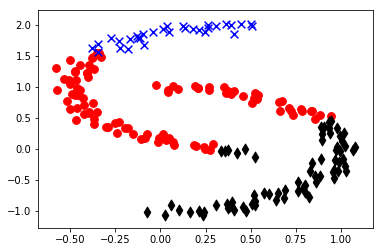

In [116]:
colors = ['r', 'k', 'b', [0,0,0], [0,0,1], [0,1,0], [0,1,1], [1,0,0], [1,0,1], [1,1,0], [1,1,1]]
markers = ['o', 'd', 'x', 'h', 'H', 7, 4, 5, 6, '8', 'p', ',', '+', '.', 's', '*', 3, 0, 1, 2]

cnt = 0
fig = plt.figure()
ax = fig.add_subplot(111)
for cluster in clusters.values():
    latits = []
    longits = []
    for cluster in clusters.values():
        latits = []
        longits = []
        for point in cluster:
            latits.append(point.latit)
            longits.append(point.longit)
        ax.scatter(longits, latits, s=60, c=colors[cnt], marker=markers[cnt])
        cnt += 1
    plt.show()
